In [1]:
import torch, pickle, json, os, sys
from utils.data import DataGenerator, collate_fn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data load and generation

- Load smiles and targets

In [2]:
data_root = '/home/jhyang/WORKSPACES/DATA'

df_qm9 = pd.read_csv(f'{data_root}/polymers/QM9/qm9_origin.csv')
smiles_q, targets_q = df_qm9.values.T[0], df_qm9.values.T[1:].T
with open(f'{data_root}/polymers/f-polymer/smiles.json') as f:
    smiles_f = json.load(f)['smiles']
targets_f = np.zeros_like(smiles_f, dtype=float) # dummy target for collate_fn

In [3]:
df = pd.read_csv(f'{data_root}/polymers/f-polymer/Fea_Gene_20220603_DieEC_Total.csv')
pd.set_option('display.max_colwidth',15)
df[~np.sum((df == 'Did not work').values, axis=1).astype(bool)]

,ID,Monomer_A,Monomer_B,Monomer_C,Monomer_D,Monomer_E,Normalized_FR_A,Normalized_FR_B,Normalized_FR_C,Normalized_FR_D,Normalized_FR_E,dielectric_constant
0,FA-00149,CC(=C)C(=O)...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,2.00,1.00,4.00,1.00,2.00,1.9600
1,FA-00151,CC(=C)C(=O)...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,4.00,1.00,2.00,1.00,2.00,2.0100
2,FA-00232,CC(=C)C(=O)...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,4.60,1.20,2.00,1.20,2.30,2.1100
3,FA-00218,CC(=C)C(=O)...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,3.59,1.14,1.93,1.12,2.22,2.1100
4,FA-00152,CC(=C)C(=O)...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,6.00,1.00,0.00,1.00,2.00,2.2600
...,...,...,...,...,...,...,...,...,...,...,...,...
208,FA-00382,FC(F)(F)C(F...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,6.00,0.00,3.00,1.00,0.00,2.5056
209,FA-00381,FC(F)(F)C(F...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,6.00,0.00,4.00,0.00,0.00,2.5112
210,FA-00384,FC(F)(F)C(F...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,6.00,0.00,1.00,3.00,0.00,2.6042
211,FA-00385,FC(F)(F)C(F...,CCCCCCCCCCC...,COC(=O)C(C)=C,CC(=C)C(O)=O,CC(=C)C(=O)...,6.00,0.00,0.00,4.00,0.00,2.7735


- generate

In [4]:
DGQ = DataGenerator(smiles=smiles_q, targets=targets_q.astype(float), include_autocorr=True, norm=True)
if os.path.isfile('../unscreened_dataset.qm9.pkl'):
    DGQ = DGQ.load('../unscreened_dataset.qm9.pkl')
#    DGUS = DGQ.load('../screened_dataset.qm9.np.pkl')
    
#else:
#DGQ.generate()

DGF = DataGenerator(smiles=smiles_f, targets=targets_f, include_autocorr=True, norm=True)
if os.path.isfile('../unscreened_dataset.fpoly.pkl'):
    DGF = DGF.load('../unscreened_dataset.fpoly.pkl')
#    DGFS = DGF.load('../screened_dataset.fpoly.pkl')
#else:
#DGF.generate()

  Overwriting attribute : smiles
  Overwriting attribute : targets
  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat
  Overwriting attribute : smiles
  Overwriting attribute : targets
  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


In [94]:
dqu = dg.load('../unscreened_dataset.qm9.pkl')
dfu = dg.load('../unscreened_dataset.fpoly.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat
  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


In [105]:
#dqu.data[0].keys(), dfu.data[0].keys()
#torch.concat([torch.tensor(d['atom']) for d in dqu.data[0:15]])
dq = dg.load('../vscreened_dataset.qm9.pkl')
for d in dq.data:
    d.update({'graph':np.zeros((d['atom'].shape[0],1), dtype=int)})
dq.save('../vscreened_dataset.qm9.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


In [2]:
dg = DataGenerator(None, None)
dg.generate_fpoly_from_csv('/home/jhyang/WORKSPACES/DATA/polymers/f-polymer/f-polymer-20220922.csv',
                           pfx_frac='FR', pfx_smiles='SMILES', col_target='Target', augmentation=1)
print(len(dg.data))

gather: 100%|██████████| 293/293 [00:02<00:00, 134.41it/s]

586


In [10]:
unique = list(set(np.hstack([d['smiles'] for d in dg.data])))
mapper = {}
for i, s in enumerate(unique):
    mapper[s] = f'{i:02d}'

In [20]:
def test(data, n_test, seed=100, min_train_ratio=0.7):
    n_data = len(data)
    if isinstance(seed, int):
        np.random.seed(seed)
    smiles = np.vstack([d['smiles'] for d in data])
    weight = np.vstack([d['weight'].reshape(1,-1) for d in data])
    unique = list(set(smiles.reshape(-1)))

    while True:
        np.random.shuffle(unique)
        test_smiles = unique[:n_test]
        test_mask  = np.zeros_like(smiles, dtype=bool)
        for s in test_smiles:
            test_mask = test_mask | (smiles == s)
        test_mask = np.sum(test_mask, axis=1) != 0
        if np.sum(~test_mask) > n_data*min_train_ratio:
            break
    return data[~test_mask], data[test_mask], test_smiles

train_data_, test_data, test_smiles = test(np.array(dg.data), n_test=5, seed=100, min_train_ratio=0.8)
train_data, valid_data, valid_smiles = test(train_data_, n_test=3, seed=100, min_train_ratio=0.8)

In [21]:
len(train_data), len(valid_data), len(test_data)

(536, 12, 38)

In [23]:
from utils.random_test import get_numpy, get_torch
import numpy as np
import torch

np.random.seed(100)
torch.random.manual_seed(100)
get_numpy(), get_torch()

(array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886]),
 tensor([0.1117, 0.8158, 0.2626, 0.4839, 0.6765]))

In [52]:
x = [1,2,3,4,5]
xs = []
for i in range(50):
    xs.append(str(np.random.permutation(x)))
len(set(xs))

44

In [29]:
len(set(xs))

69

In [102]:
dqu.data[-1]['atom'].shape, dqu.data[-1]['graph'].shape, 

((9, 26), (9, 1))

In [97]:
dfu.data[0]['graph'].shape, dfu.data[0]['atom'].shape

((63, 1), (63, 26))

In [7]:
from utils.data import DataGenerator, collate_fn, collate_fn_fpoly
DGFP = DataGenerator(smiles=None, targets=None, include_autocorr=True, norm=True)
DGFP.generate_fpoly_from_csv('/home/jhyang/WORKSPACES/DATA/polymers/f-polymer/Fea_Gene_20220603_DieEC_Total.csv')


gather:   0%|          | 0/202 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [8]:
f, t, s = collate_fn_fpoly(DGF.data[:3])

In [13]:
from model.modules import FineTuner, CATEncoder
from torch import nn
epochs = 2000
atom_net_params  = {
    'n_atom_feat':26,
    'n_bond_feat':5,
    'graph':'cg',
    'hidden_dim':64,
    'output_dim':32,
    'n_layer':4
}
mol_net_params  = {
    'input_dim':399,
    'hidden_dims':[256, 128],
    'output_dim':32,
}
encoder = CATEncoder(
    atom_net_params=atom_net_params,
    mol_net_params=mol_net_params,
)

model = FineTuner(encoder, [nn.Linear(5*(atom_net_params['output_dim']+mol_net_params['output_dim']), 1)])
model = model.cuda()
model

FineTuner(
  (encoder): CATEncoder(
    (atomnet): GraphNet(
      (embed): Sequential(
        (0): Linear(in_features=26, out_features=64, bias=True)
        (1): ELU(alpha=1.0)
      )
      (graph): Sequential(
        (0): CGConv(64, dim=5)
        (1): CGConv(64, dim=5)
        (2): CGConv(64, dim=5)
        (3): CGConv(64, dim=5)
      )
      (output): Linear(in_features=64, out_features=32, bias=True)
    )
    (molnet): DNN(
      (network): Sequential(
        (0): Sequential(
          (0): Linear(in_features=399, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ELU(alpha=1.0)
        )
        (1): Sequential(
          (0): Sequential(
            (0): Linear(in_features=256, out_features=128, bias=True)
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): Dropout(p=0.3, inplace=False)
            (3): ELU(alpha=1.0)
    

In [28]:
#DGFP.save('../unscreened_dataset.fpoly.pkl')
DGQ = DataGenerator(None, None)
DGQ = DGQ.load('../screened_dataset.qm9.pkl')

DGF.screen_by_mask(mask_atom = DGQ.mask_atom, 
                    mask_bond = DGQ.mask_bond, 
                    mask_mol = DGQ.mask_mol)
#DGF.save('../screened_dataset.fpoly.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


screen: 100%|██████████| 202/202 [00:00<00:00, 116029.77it/s]


In [13]:
mask = ~np.sum((df == 'Did not work').values, axis=1).astype(bool)
col_smiles = [f'Monomer_{x}' for x in 'ABCDE']
col_weights = [f'Normalized_FR_{x}' for x in 'ABCDE']
df.loc[mask, col_smiles].values

array([['CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C',
        'CC(=C)C(O)=O', 'CC(=C)C(=O)OCCO'],
       ['CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C',
        'CC(=C)C(O)=O', 'CC(=C)C(=O)OCCO'],
       ['CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C',
        'CC(=C)C(O)=O', 'CC(=C)C(=O)OCCO'],
       ...,
       ['FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C',
        'CC(=C)C(O)=O', 'CC(=C)C(=O)OCCO'],
       ['FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C',
        'CC(=C)C(O)=O', 'CC(=C)C(=O)OCCO'],
       ['FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C',
        'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C', 'COC(=O)C(C)=C', 'OC(=O)C=C',
        'CC(=C)C(=O)OCCO']], dtype=object)

- merge

In [16]:
dgsf.n_mol_feat = int(dgsf.n_mol_feat)
dgsf.save('../screened_dataset.fpoly.pkl', overwrite=True)

In [5]:
feat_q, tgt_q, _ = collate_fn(DGQ.data)
feat_f, tgt_f, _ = collate_fn(DGF.data)

In [8]:
atom_q, bond_q, edge_q, mol_q = feat_q['atom_feat'].cpu().numpy(), feat_q['bond_feat'].cpu().numpy(), feat_q['bond_idx'].cpu().numpy(), feat_q['mol_feat'].cpu().numpy()
atom_f, bond_f, edge_f, mol_f = feat_f['atom_feat'].cpu().numpy(), feat_f['bond_feat'].cpu().numpy(), feat_f['bond_idx'].cpu().numpy(), feat_f['mol_feat'].cpu().numpy()
atom_q.shape, bond_q.shape, edge_q.shape, mol_q.shape, DGQ.n_atom_feat, DGQ.n_bond_feat, DGQ.n_mol_feat

((1177631, 26), (2517932, 5), (2, 2517932), (133885, 399), 26, 5, 399)

In [40]:
import numpy as np
import torch

fn = [np.random.rand(10000).reshape(100,100) for _ in range(256)]
ft = [torch.tensor(f).float() for f in fn]

%timeit torch.tensor(np.vstack(fn)).float()
%timeit torch.concat(ft).float()
%timeit torch.concat([torch.tensor(f).float() for f in fn])

6.4 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
813 µs ± 48.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.7 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
d = [np.zeros((1,1), dtype='float32') for _ in range(100)]

%timeit torch.tensor(np.vstack(d)).float()
%timeit torch.tensor(d).float()

22.3 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
57.6 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


- test readout

In [8]:
from torch_geometric.nn import global_mean_pool

x = global_mean_pool(atom_q, gidx_q)
x.shape, tgt_q.shape # well operating

(torch.Size([133885, 26]), torch.Size([133885, 12]))

In [7]:
tmax = torch.max(mol_q, dim=0).values
DGQ.name_mol_feat[np.where((tmax > 100).numpy())[0]]

array([], dtype='<U24')

### Screening

In [6]:
from ypack.utils.feature_screening import screen_high_pcc, screen_low_var

#### Atomic features

- screen by variance

In [12]:
mask_vq = screen_low_var(atom_q, names=DGQ.name_atom_feat, th=1e-4, axis=1)
mask_vf = screen_low_var(atom_f, names=DGF.name_atom_feat, th=1e-5, axis=1)
mask_av = mask_vq & mask_vf

Total 5 features are screened (th: 0.00010)
   Screened indexes:
	 [13 17 18 23 24]
   Screened feature names:
 	 ['block' 'fusion_heat' 'metallic_radius' 'ele_config_d' 'ele_config_f']
   Dimension: (1177631, 26) -> (1177631, 21)
Total 6 features are screened (th: 0.00001)
   Screened indexes:
	 [13 18 20 21 23 24]
   Screened feature names:
 	 ['block' 'metallic_radius' 'period' 'ele_config_s' 'ele_config_d'
 'ele_config_f']
   Dimension: (11809, 26) -> (11809, 20)


- screen by pcc

In [13]:
mask_pq = screen_high_pcc(atom_q, names=DGQ.name_atom_feat, th=1-1e-3, axis=1)
mask_pf = screen_high_pcc(atom_f, names=DGF.name_atom_feat, th=1-1e-3, axis=1)
mask_ap = mask_pq & mask_pf

Total 3 features are screened (th: 0.99900)
   Screened indexes:
	 [ 6 11 22]
   List of indexes:
	  0 [Mass]               : 11 [atomic_number], 22 [ele_config_p]
	  2 [ImplicitValence]    : 6 [NumImplicitHs]
	 16 [en_pauling]         : 11 [atomic_number], 22 [ele_config_p]
   Screened feature names:
 	 ['NumImplicitHs' 'atomic_number' 'ele_config_p']
   Dimension: (1177631, 26) -> (1177631, 23)
Total 5 features are screened (th: 0.99900)
   Screened indexes:
	 [ 6  9 11 16 22]
   List of indexes:
	  2 [ImplicitValence]    : 6 [NumImplicitHs], 9 [TotalNumHs]
	 10 [TotalValence]       : 11 [atomic_number], 16 [en_pauling], 22 [ele_config_p]
   Screened feature names:
 	 ['NumImplicitHs' 'TotalNumHs' 'atomic_number' 'en_pauling' 'ele_config_p']
   Dimension: (11809, 26) -> (11809, 21)


/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


- feature mask

In [14]:
mask_atom_feat = mask_av & mask_ap
np.sum(mask_atom_feat)

14

#### Bond feature

- screen by variance

In [15]:
mask_vq = screen_low_var(bond_q, names=DGQ.name_bond_feat, th=1e-4, axis=1)
mask_vf = screen_low_var(bond_f, names=DGF.name_bond_feat, th=1e-5, axis=1)
mask_bv = mask_vq & mask_vf

Total 0 features are screened (th: 0.00010)
   Screened indexes:
	 []
   Screened feature names:
 	 []
   Dimension: (2517932, 5) -> (2517932, 5)
Total 0 features are screened (th: 0.00001)
   Screened indexes:
	 []
   Screened feature names:
 	 []
   Dimension: (21670, 5) -> (21670, 5)


- screen by pcc

In [16]:
mask_pq = screen_high_pcc(bond_q, names=DGQ.name_bond_feat, th=1-1e-2, axis=1)
mask_pf = screen_high_pcc(bond_f, names=DGF.name_bond_feat, th=1-1e-3, axis=1)
mask_bp = mask_pq & mask_pf

Total 1 features are screened (th: 0.99000)
   Screened indexes:
	 [2]
   List of indexes:
	  0 [BondType]           : 2 [IsAromatic]
   Screened feature names:
 	 ['IsAromatic']
   Dimension: (2517932, 5) -> (2517932, 4)
Total 0 features are screened (th: 0.99900)
   Screened indexes:
	 []
   List of indexes:
   Screened feature names:
 	 []
   Dimension: (21670, 5) -> (21670, 5)


- feature mask

In [17]:
mask_bond_feat = mask_bv & mask_bp
np.sum(mask_bond_feat)

4

#### Molecular feature

- screen by variance

In [19]:
mask_vq = screen_low_var(mol_q, names=DGQ.name_mol_feat, th=1e-4, axis=1)
mask_vf = screen_low_var(mol_f, names=DGF.name_mol_feat, th=1e-5, axis=1)
mask_mv = mask_vq & mask_vf

Total 103 features are screened (th: 0.00010)
   Screened indexes:
	 [  9  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 126 134 140 144 153 154 155 157 159 160 167 168 171
 172 181 182 183 189 190 194 197 198 199 202 203 204 261 262 269 270 277
 278 286 292 293 294 295 296 297 298 299 300 301 302]
   Screened feature names:
 	 ['NumRadicalElectrons' 'PEOE_VSA1' 'PEOE_VSA10' 'PEOE_VSA11' 'PEOE_VSA12'
 'PEOE_VSA13' 'PEOE_VSA14' 'PEOE_VSA2' 'PEOE_VSA3' 'PEOE_VSA4' 'PEOE_VSA5'
 'PEOE_VSA6' 'PEOE_VSA7' 'PEOE_VSA8' 'PEOE_VSA9' 'SMR_VSA1' 'SMR_VSA10'
 'SMR_VSA2' 'SMR_VSA3' 'SMR_VSA4' 'SMR_VSA5' 'SMR_VSA6' 'SMR_VSA7'
 'SMR_VSA8' 'SMR_VSA9' 'SlogP_VSA1' 'SlogP_VSA10' 'SlogP_VSA11'
 'SlogP_VSA12' 'SlogP_VSA2' 'SlogP_VSA3' 'SlogP_VSA4' 'SlogP_VSA5'
 'SlogP_VSA6' 'SlogP_VSA7' 'SlogP_VSA8' 'SlogP_VSA9' 'TPSA' 'ES

- screen by pcc

In [20]:
mask_pq = screen_high_pcc(mol_q, names=DGQ.name_mol_feat, th=1-1e-2, axis=1)
mask_pf = screen_high_pcc(mol_f, names=DGF.name_mol_feat, th=1-1e-3, axis=1)
mask_mp = mask_pq & mask_pf

Total 142 features are screened (th: 0.99000)
   Screened indexes:
	 [  2   6   7   8  10  12  17  18  26  29  32  34  36  38  40  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 111 121 130 131 133 143 182 188 223 224 225 226 227 228 229 230
 239 240 242 243 244 245 246 275 276 277 278 295 296 297 298 299 300 301
 302 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 398]
   List of indexes:
	  0 [MaxEStateIndex]     : 2 [MaxAbsEStateIndex]
	  5 [MolWt]              : 6 [HeavyAtomMolWt], 7 [ExactMolWt], 8 [NumValenceElectrons], 10 [MaxPartialCharge], 17 [BCUT2D_MWHI], 18 [BCUT2D_MWLOW], 26 [BertzCT], 40 [Ipc], 43 [LabuteASA], 44 [PEOE_VSA1], 45 [PEOE_VSA10], 46 [PEOE_VSA11], 47 [PEOE_VSA12], 48 [PEOE_VSA13], 49 [PEOE_VS

/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


- feature mask

In [21]:
mask_mol_feat = mask_mv & mask_mp
np.sum(mask_mol_feat)

165

#### Save datasets

- unscreened data

In [19]:
DGQ.save('unscreened_dataset.qm9.pickle')
DGF.save('unscreened_dataset.fpoly.pickle')

- screened data

In [20]:
DGQ.screen_by_mask(mask_atom=mask_atom_feat, 
                   mask_bond=mask_bond_feat, 
                   mask_mol=mask_mol_feat)
#DGF.screen_by_mask(mask_atom=mask_atom_feat, 
#                   mask_bond=mask_bond_feat, 
#                   mask_mol=mask_mol_feat)
DGQ.save('screened_dataset.qm9.np.pkl', overwrite=True)
#DGF.save('screened_dataset.fpoly.pickle', overwrite=True)

screen: 100%|██████████| 46/46 [00:00<00:00, 46003.33it/s]


In [22]:
DGQ.screen_by_mask(mask_atom=mask_av, 
                   mask_bond=mask_bv, 
                   mask_mol=mask_mv)
DGF.screen_by_mask(mask_atom=mask_av,
                   mask_bond=mask_bv,
                   mask_mol=mask_mv)
DGQ.save('vscreened_dataset.qm9.pkl', overwrite=True)
DGF.save('vscreened_dataset.fpoly.pkl', overwrite=True)

screen: 100%|██████████| 202/202 [00:00<00:00, 89532.86it/s]


#### Inspect data for normalization

In [34]:
def get_info(feat):
    f = np.hstack(feat)
    return f'mean: {np.mean(f):>10.3f}\nmedi : {np.median(f):>10.3f}\nmax  : {np.max(f):>10.3f}\nmin   : {np.min(f):>10.3f}\nvar    : {np.var(f):>10.3f}'

6it [00:00, 10.86it/s]


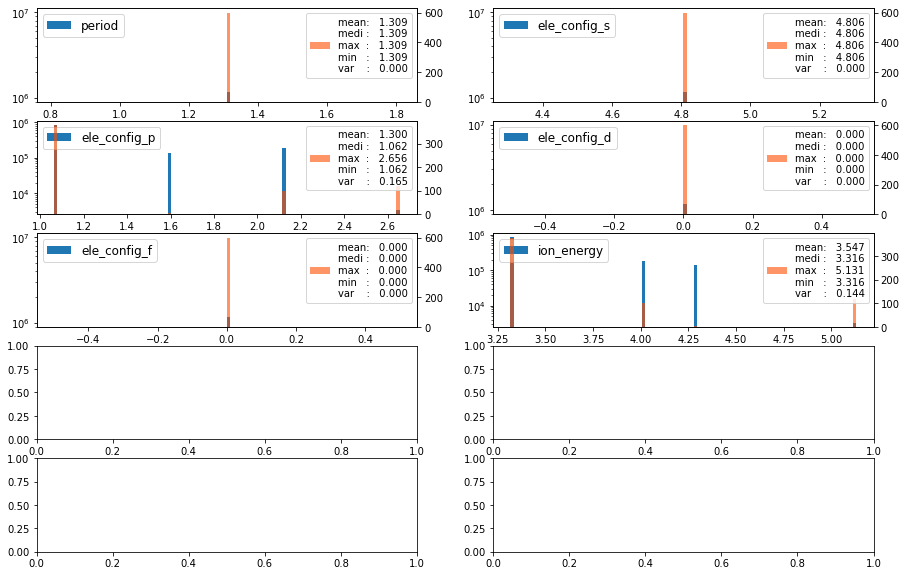

In [31]:
import tqdm
idx=20
f, axs = plt.subplots(5, 2, figsize=(15, 10))
for i, ax in tqdm.tqdm(enumerate(axs.reshape(-1))):
    if i + idx == atom_q.T.shape[0]: break
    n = DGQ.name_atom_feat[i + idx]
    feat1 = atom_q.T[i + idx].numpy()
    ax.hist(feat1, bins=100, label=n)
    feat2 = atom_f.T[i + idx].numpy()
    ax2 = ax.twinx()
    ax2.hist(feat2, bins=100, alpha=0.6, color=[1,0.3,0], label=get_info([feat1, feat2]))
    ax.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=10)
    ax.set_yscale('log')
    

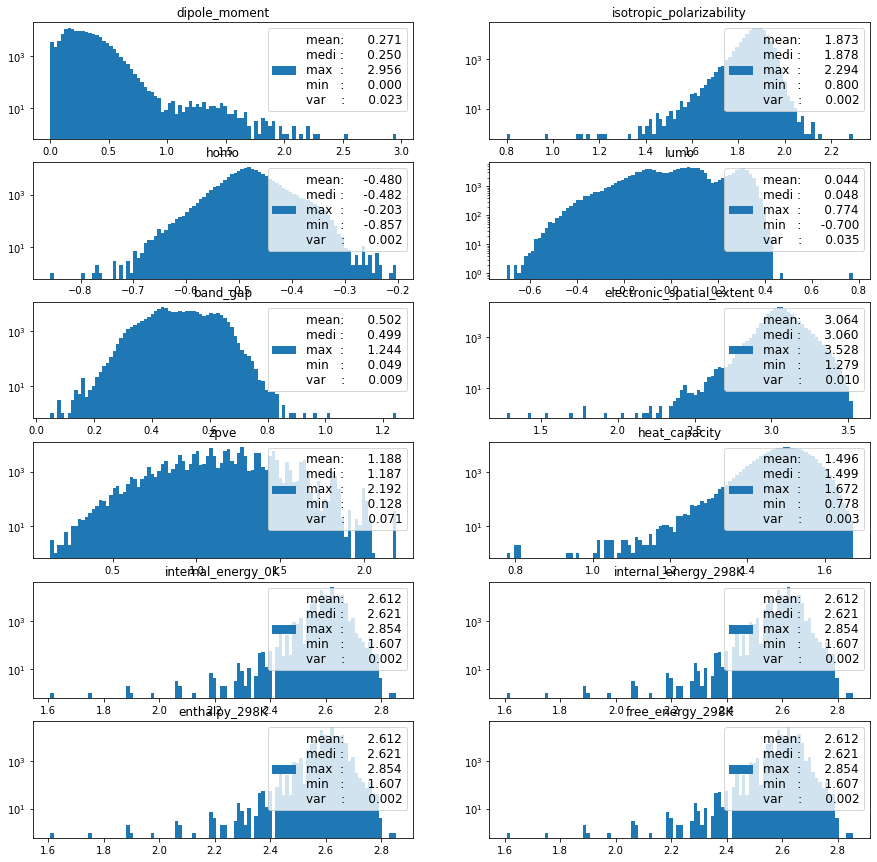

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('/home/jhyang/WORKSPACES/DATA/polymers/QM9/target.csv')
f, axs = plt.subplots(6, 2, figsize=(15, 15))
scalers = {
    'dipole_moment':lambda x: x/10,
    'isotropic_polarizability':lambda x: np.log10(x),
    'homo':lambda x: x*2,
    'lumo':lambda x: x*4,
    'band_gap':lambda x: x*2,
    'electronic_spatial_extent':lambda x: np.log10(x),
    'zpve':lambda x: x*8,
    'heat_capacity':lambda x: np.log10(x),
    'internal_energy_0K':lambda x: np.log10(-x),
    'internal_energy_298K':lambda x: np.log10(-x),
    'enthalpy_298K':lambda x: np.log10(-x),
    'free_energy_298K':lambda x: np.log10(-x),    
}
for ax, (n, val) in zip(axs.reshape(-1), df.iteritems()):
    target = scalers[n](val.values)
    ax.set_title(n, fontsize=12)
    ax.hist(target, bins=100, label=get_info(target))
    ax.legend(loc='upper right', fontsize=12)
    ax.set_yscale('log')

In [32]:
for n, v in df.iteritems():
    print(n,v.values.shape)

dipole_moment (133885,)
isotropic_polarizability (133885,)
homo (133885,)
lumo (133885,)
band_gap (133885,)
electronic_spatial_extent (133885,)
zpve (133885,)
heat_capacity (133885,)
internal_energy_0K (133885,)
internal_energy_298K (133885,)
enthalpy_298K (133885,)
free_energy_298K (133885,)


In [4]:
from utils.data import DataGenerator
dg = DataGenerator(None, None)
udg = dg.load('../unscreened_dataset.qm9.pkl')
vdg = dg.load('../vscreened_dataset.qm9.pkl')
sdg = dg.load('../screened_dataset.qm9.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat
  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat
  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


In [11]:
dg = DataGenerator(None, None)
ufd = dg.load('../unscreened_dataset.fpoly.pkl')

  Overwriting attribute : norm
  Overwriting attribute : ptable
  Overwriting attribute : ptbl_feat_name
  Overwriting attribute : data
  Setting new attribute : name_atom_feat
  Setting new attribute : name_bond_feat
  Setting new attribute : name_mol_feat


In [82]:
def train_test_split_by_smiles(data, valid, test):
    train_data = []
    valid_data = []
    test_data  = []
    for d in data:
        data_smiles = ' '.join(list(d['smiles']))
        is_train = True
        for smiles in valid:
            if smiles in data_smiles:
                valid_data.append(data)
                is_train = False
                break
        for smiles in test:
            if smiles in data_smiles:
                test_data.append(data)
                is_train = False
                break
        if is_train:
            train_data.append(data)
    return train_data, valid_data, test_data            

train, valid, test = train_test_split_by_smiles(ufd.data,
                                                valid = ['CC(=C)C(=O)OCC(F)(F)F', 'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F'],
                                                test = ['FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C', 'CC(=C)C(=O)OCC(F)(F)C(F)F', 'FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C'],
)
print(len(train), len(valid), len(test))

153 19 30
